In [ ]:
""""
                                                Assignment No. 3
                                                
Ques No. 2) Implement the mutually recursive HITS algorithm. 
=============================================================================================================================

Steps:

1. User can manually input values in form of edges or adjacency matrix or can read them from a file
2. Implementation of mutually recurrsive Hits Algorithm
3. Plotting the authority and hub scores.
===============================================================================================================================================================

Made by

Author: Mugdha Satish Kolhe
Enrollment No: BT17CSE043
Course Code: CSL-436
Course: Information Retrieval

"""

In [8]:
from array import array
from numpy import *
import matplotlib.pyplot as plt
import numpy as np
from itertools import islice
from numpy.linalg import norm

In [9]:
def Hits_and_Authority_Score(A, n, x):       #function to implement Hits algorithm with input as Adjacency Matrix and no of iterations
    
    no_pages= len(A)   #calculate length of Adjacency Matrix A
    
    auth = ones(no_pages)
    hub = ones(no_pages)
    
    i=0
    while(1):   #loop to implement mutually recursive hash function; run algo k steps
        nm = 0
        prev_auth=auth
        prev_hub=hub
        for j in range(no_pages):
            auth[j]=0
            
            for k in range(no_pages):
                
                if(A[k][j]==1):       #set of pages that link to page j
                    auth[j]+=hub[k]
            
            nm+=auth[j]             #calculate sum to normalize
        
        for j in range(no_pages):   #normalization
            auth[j]/=nm
        #auth=auth/norm(auth)
        
        nm=0
        for j in range(no_pages):
            hub[j]=0
            
            for k in range(no_pages):
                
                if(A[j][k]==1):        #set of pages that j links to
                    hub[j]+=auth[k]
            
            nm+=hub[j]            #calculate sum to normalize
        
        for j in range(no_pages):
            hub[j]/=nm            #normalization
        #hub=hub/norm(hub)
        
        print("\nIteration No. "+str(i+1))
        print("\nAuthority Scores: ")
        print(auth)
        print("\nHub Scores:")
        print(hub)
        i=i+1
        if(n==1):
            if(i==x):
                break
        elif(n==0):
            if(norm(auth-prev_auth)<x and norm(hub-prev_hub)<x):
                break
    return auth, hub
    

In [10]:
#plotting graph for auth scores

def plot_auth_scores(n, auth):
    label = websites[0:n] 
    index = np.arange(len(label))
    plt.bar(index, auth)
    plt.xlabel('Websites', fontsize=10)
    plt.ylabel('Authority Score', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Authority Score')
    plt.show()

In [11]:
#plotting graph for hub scores

def plot_hub_scores(n, hub):
    label = websites[0:n] 
    index = np.arange(len(label))
    plt.bar(index, hub)
    plt.xlabel('Websites', fontsize=10)
    plt.ylabel('Hub Score', fontsize=10)
    plt.xticks(index, label, fontsize=10, rotation=30)
    plt.title('Hub Scores ')
    plt.show()

In [6]:
#main 
no_of_pages = input("Enter no of pages")   # inputting no of pages 
no_of_pages = int(no_of_pages)

n=input("Press 2 for entering edges \n1 for giving input \nelse press 0 for random: ")
n=int(n)
if(n==0):
    Adjacency_Matrix = [[random.randint(0,2) for x in range(no_of_pages)] for y in range(no_of_pages)]    #randomly generating adjancy matrix
    A = array(Adjacency_Matrix)
elif(n==1):
    A = [] 
    print("Enter the entries rowwise:") 
  
    # For user input 
    for i in range(no_of_pages):          # A for loop for row entries 
        a =[] 
        for j in range(no_of_pages):      # A for loop for column entries 
             a.append(int(input())) 
        A.append(a)
elif(n==2):
    arr = [] 
    print("Enter no of edges:") 
    x=int(input())
    # For user input 
    for i in range(x):          # A for loop for row entries 
        a =[] 
        for j in range(2):      # A for loop for column entries 
            a.append(int(input())) 
        arr.append(a)
    arr = array(arr)
    A = [[0 for i in range(no_of_pages)] for j in range(no_of_pages)]
    for row,col in arr:
        A[row][col] = 1  

input_string = input("Enter names of pages ")     #inputting names of pages/website links
websites = input_string.split()

print("\nValues of Adjacency Matrix are: ")
print(A)

n=input("\nPress 1 for fixed iterations \nelse press 0 to enter threshold: ")
n=int(n)
if(n==0):
    th = input("Enter threshold")    #inputting threshold
    x = float(th)
elif(n==1):
    itr = input("Enter no of iterations")    #inputting no of iterations
    x = float(itr)
    
auth, hub = Hits_and_Authority_Score(A, n, x)    #Hits Algorithm

print("\nAuthority Scores: ")
print(auth)
print("\nHub Scores:")
print(hub)

Enter no of pages2
Press 2 for entering edges 1 for giving input else press 0 for random: 2
Enter no of edges:
1
0
0
Enter names of pages 1

Values of Adjacency Matrix are: 
[[1, 0], [0, 0]]
Press 1 for fixed iterations else press 0 to enter threshold: 1
Enter no of iterations3

Iteration No. 1

Authority Scores: 
[1. 0.]

Hub Scores:
[1. 0.]

Iteration No. 2

Authority Scores: 
[1. 0.]

Hub Scores:
[1. 0.]

Iteration No. 3

Authority Scores: 
[1. 0.]

Hub Scores:
[1. 0.]

Authority Scores: 
[1. 0.]

Hub Scores:
[1. 0.]


In [18]:
#file reading
with open('input1.txt', 'r') as f:
    websites = f.readline()
    print(websites)

    
websites = list(websites.split(" ")) 

no_of_pages = len(websites)
print(no_of_pages)

with open('input1.txt', 'r') as fin:
    matrix = []
    for line in islice(fin, 1, no_of_pages+1):
        items = line.split()
        numbers = [int(item) for item in items]
        matrix.append(numbers)
fin.close()

A = array(matrix)
print(A)

n=input("Press 1 for fixed iterations else press 0 to enter threshold: ")
n=int(n)
if(n==0):
    th = input("Enter threshold")    #inputting threshold
    x = float(th)
elif(n==1):
    itr = input("Enter no of iterations")    #inputting no of iterations
    x = float(itr)
    
auth, hub = Hits_and_Authority_Score(A, n, x)    #Hits Algorithm

auth, hub = Hits_and_Authority_Score(A, n, x)    #Hits Algorithm
print("\nAuthority Scores: ")
print(auth)
print("\nHub Scores:")
print(hub)

facebook.com twitter.com google.com youtube.com instagram.com

5
[[0 1 0 0 1]
 [0 0 1 0 0]
 [1 1 0 1 0]
 [1 0 0 0 1]
 [1 0 0 1 0]]
Press 1 for fixed iterations else press 0 to enter threshold: 1
Enter no of iterations10

Iteration No. 1

Authority Scores: 
[0.3 0.2 0.1 0.2 0.2]

Hub Scores:
[0.18181818 0.04545455 0.31818182 0.22727273 0.22727273]

Iteration No. 2

Authority Scores: 
[0.34 0.22 0.02 0.24 0.18]

Hub Scores:
[0.17241379 0.00862069 0.34482759 0.22413793 0.25      ]

Iteration No. 3

Authority Scores: 
[0.35055351 0.22140221 0.00369004 0.25461255 0.1697417 ]

Hub Scores:
[0.16666667 0.00157233 0.35220126 0.22169811 0.25786164]

Iteration No. 4

Authority Scores: 
[0.35384615 0.22073579 0.0006689  0.25953177 0.16521739]

Hub Scores:
[1.64013644e-01 2.84252416e-04 3.54462763e-01 2.20579875e-01
 2.60659466e-01]

Iteration No. 5

Authority Scores: 
[3.54986718e-01 2.20236658e-01 1.20743782e-04 2.61289544e-01
 1.63366337e-01]

Hub Scores:
[1.62898016e-01 5.12741629e-05 3.5522740

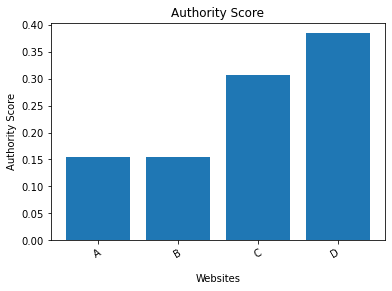

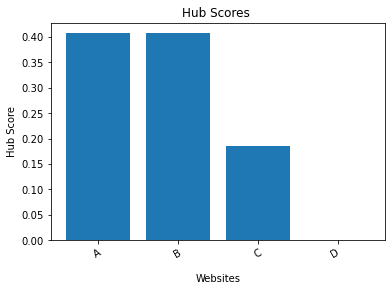

In [17]:
plot_auth_scores(no_of_pages, auth)   #plotting the scores
plot_hub_scores(no_of_pages, hub)

## 